# 📝 Exercise M4.02

The goal of this exercise is to build an intuition on what will be the
parameters' values of a linear model when the link between the data and the
target is non-linear.

First, we will generate such non-linear data.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"><tt class="docutils literal">np.random.RandomState</tt> allows to create a random number generator which can
be later used to get deterministic results.</p>
</div>

In [20]:
import numpy as np
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">To ease the plotting, we will create a Pandas dataframe containing the data
and target</p>
</div>

In [21]:
import pandas as pd
full_data = pd.DataFrame({"data": data, "target": target})

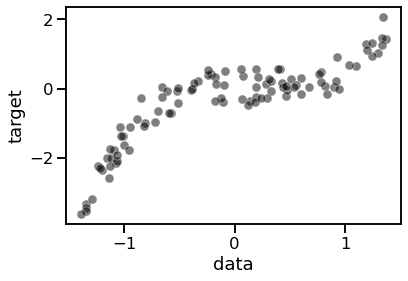

In [22]:
import seaborn as sns

_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

We observe that the link between the data `data` and vector `target` is
non-linear. For instance, `data` could represent the years of
experience (normalized) and `target` the salary (normalized). Therefore, the
problem here would be to infer the salary given the years of experience.

Using the function `f` defined below, find both the `weight` and the
`intercept` that you think will lead to a good linear model. Plot both the
data and the predictions of this model.

In [23]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data + intercept
    return target_predict

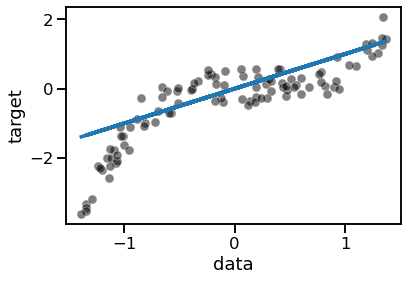

In [34]:
y= f(data, 1, 0)
ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

ax.plot(data, y)


Compute the mean squared error for this model

In [35]:
print(f"mse: {np.mean((full_data['target'] - y).apply(lambda x:x**2)):.3f}")

mse: 0.506


Train a linear regression model on this dataset.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, by convention <tt class="docutils literal">data</tt> (also called <tt class="docutils literal">X</tt> in the scikit-learn
documentation) should be a 2D matrix of shape <tt class="docutils literal">(n_samples, n_features)</tt>.
If <tt class="docutils literal">data</tt> is a 1D vector, you need to reshape it into a matrix with a
single column if the vector represents a feature or a single row if the
vector represents a sample.</p>
</div>

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()


In [54]:
#can also use (-1,1) as reshape param to infer length of data
data_2d = np.reshape(data, (len(data),1))
lin_reg_model.fit(data_2d, target)

print(f"coefficients: {lin_reg_model.coef_}")

coefficients: [1.24617601]


Compute predictions from the linear regression model and plot both the data
and the predictions.

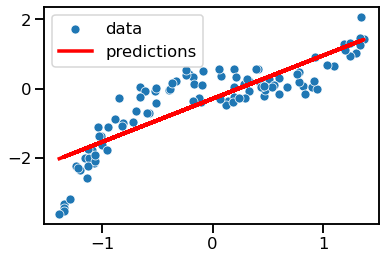

In [67]:
pred = lin_reg_model.predict(data_2d)

ax = sns.scatterplot(x=data, y=target, label='data')
ax.plot(data,pred, label='predictions', color='red')

ax.legend()

Compute the mean squared error

In [69]:
from sklearn.metrics import mean_squared_error

print(f"mse: {mean_squared_error(target, pred):.3f}")

mse: 0.371
